<a href="https://colab.research.google.com/github/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/blob/master/Clusterizacao_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fazer um sistema de recomendacao com filmes pelo generos agrupando de formar particionada

1.   pegar os dados
2.   conhecendo os dados
1.   mudar os nomes, columns = ['
2.   extrair os dados passando dados para coulunas binarias, get_dummies
1.   junto os dois dataframe, pd.concat([
2.   gerar um escala/nivel de genero sendo um filmes mais de comedia doque animaçao, StandardScaler
1.   agrupar os filmes usando Cluesteriracao, KMeans
2.   Visualizar os grupos
1.   Diminuir as dimençoes com TNSE para visualias os grupos usando o SEABORN
2.   Qual a quantidade de grupos que devo usar o método do cotovelo "elbow method"
1.   método é chamado de erro médio quadrado, ou mean squarred error (MSE).
2.   List item





o KMeans funciona, passa o numero de cluster, ele joga entao 3 pontos aleatorio chamado de centroids, calcula depois a distancia entre os 3 pontos, pega a metade do camilho e divide os dados dessa metade, recalcula a posição dos centroides os pontos para otimiza a a distancia dos dado realocando o centroides.

assim como redistribuir um hospital por regiao e bairro

- https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
- https://filosophy.org/writing/visual-algorithms-k-means-clustering/







In [0]:
import pandas as pd

uri = 'https://raw.githubusercontent.com/EduardoMoraesRitter/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes_df = pd.read_csv(uri)

filmes_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
filmes_df.columns = ['filme_id', 'titulo', 'generos']
filmes_df.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
type(filmes_df)

pandas.core.frame.DataFrame

In [0]:
type(filmes_df.generos)

pandas.core.series.Series

In [0]:
filmes_df.generos.str

In [0]:
filmes_df.generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [0]:
filmes_df.generos.str.get_dummies()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
generos_df = filmes_df.generos.str.get_dummies()
#axis eixo de concatenacao
dados_filmes_df = pd.concat([filmes_df, generos_df], axis=1)
dados_filmes_df.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#para escalar os dados usar a biblioteca de escalamento
from sklearn.preprocessing import StandardScaler

#treina o escalamneto
scaler = StandardScaler()
generos_escalados_ndarray = scaler.fit_transform(generos_df)

generos_escalados_ndarray

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [0]:
generos_escalados_ndarray.shape

(9742, 20)

In [0]:
#escalado Toy Story
print(generos_escalados_ndarray[53])
print(dados_filmes_df.loc[53])

[-0.05917995 -0.48060698  2.59101927 -0.25867916  3.69752441 -0.7921263
 -0.37463158 -0.21748944 -0.90024672  3.3920166  -0.09492563 -0.3340552
 -0.12839708 -0.18841895 -0.24998637 -0.44263346 -0.33443476 -0.49125897
 -0.20201972 -0.13206534]
filme_id                                              60
titulo                Indian in the Cupboard, The (1995)
generos                       Adventure|Children|Fantasy
(no genres listed)                                     0
Action                                                 0
Adventure                                              1
Animation                                              0
Children                                               1
Comedy                                                 0
Crime                                                  0
Documentary                                            0
Drama                                                  0
Fantasy                                                1
Film-Noir       

In [0]:
print(dados_filmes_df['Adventure'].sum())
print(dados_filmes_df['Children'].sum())
print(dados_filmes_df['Fantasy'].sum())

1263
664
779


In [0]:
#filter
print(dados_filmes_df[dados_filmes_df.generos == 'Adventure|Children|Fantasy'])

      filme_id                                             titulo  ... War  Western
1            2                                     Jumanji (1995)  ...   0        0
53          60                 Indian in the Cupboard, The (1995)  ...   0        0
109        126                  NeverEnding Story III, The (1994)  ...   0        0
767       1009                    Escape to Witch Mountain (1975)  ...   0        0
1514      2043          Darby O'Gill and the Little People (1959)  ...   0        0
1556      2093                                Return to Oz (1985)  ...   0        0
1617      2161                      NeverEnding Story, The (1984)  ...   0        0
1618      2162  NeverEnding Story II: The Next Chapter, The (1...  ...   0        0
1799      2399                      Santa Claus: The Movie (1985)  ...   0        0
3574      4896  Harry Potter and the Sorcerer's Stone (a.k.a. ...  ...   0        0
6075     41566  Chronicles of Narnia: The Lion, the Witch and ...  ...   0  

In [0]:
#agrupar os filmes usando Cluesteriracao - KMeans
from sklearn.cluster import KMeans

#criar um modele, passando o numero de grupos n_clusters
modelo = KMeans(n_clusters = 3)
modelo.fit(generos_escalados_ndarray)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#imprimir os grupos, pegar os rotulos com labels
print('grupos {}'.format(modelo.labels_))

grupos [0 0 1 ... 1 0 1]


In [0]:
#o f é o format
print(f'grupos {modelo.labels_}')

grupos [0 0 1 ... 1 0 1]


In [0]:
print(generos_df.columns)
#centro de cada grupo
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.26831384  1.3317561   2.10103332  1.817957    0.03690314
  -0.31826268 -0.19871589 -0.63563444  1.38330705 -0.09492563 -0.25621725
   0.58148571  0.34187182 -0.12156888 -0.27146432  0.26502195 -0.44446554
  -0.16184793 -0.09452111]
 [ 0.03825643 -0.25984178 -0.19174374 -0.25240566 -0.1893079   0.2665735
  -0.2691721   0.13652527  0.14589527 -0.17268414 -0.08953633 -0.27275634
  -0.1123415   0.02520626 -0.18821223  0.21033762 -0.20970076 -0.47802047
   0.08705828  0.05152002]
 [-0.05917995  0.45094456 -0.08282745 -0.23657588 -0.2661983  -0.57705538
   0.68568376 -0.21576903 -0.07542028 -0.14201535  0.22407295  0.67051738
   0.02433738 -0.17860162  0.44243709 -0.34513945  0.34615465  1.17344364
  

In [0]:
#transformar em dataframe
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.268314,1.331756,2.101033,1.817957,0.036903,-0.318263,-0.198716,-0.635634,1.383307,-0.094926,-0.256217,0.581486,0.341872,-0.121569,-0.271464,0.265022,-0.444466,-0.161848,-0.094521
1,0.038256,-0.259842,-0.191744,-0.252406,-0.189308,0.266573,-0.269172,0.136525,0.145895,-0.172684,-0.089536,-0.272756,-0.112342,0.025206,-0.188212,0.210338,-0.209701,-0.478020,0.087058,0.051520
2,-0.059180,0.450945,-0.082827,-0.236576,-0.266198,-0.577055,0.685684,-0.215769,-0.075420,-0.142015,0.224073,0.670517,0.024337,-0.178602,0.442437,-0.345139,0.346155,1.173444,-0.124712,-0.074264


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa2c25198>,
      dtype=object)

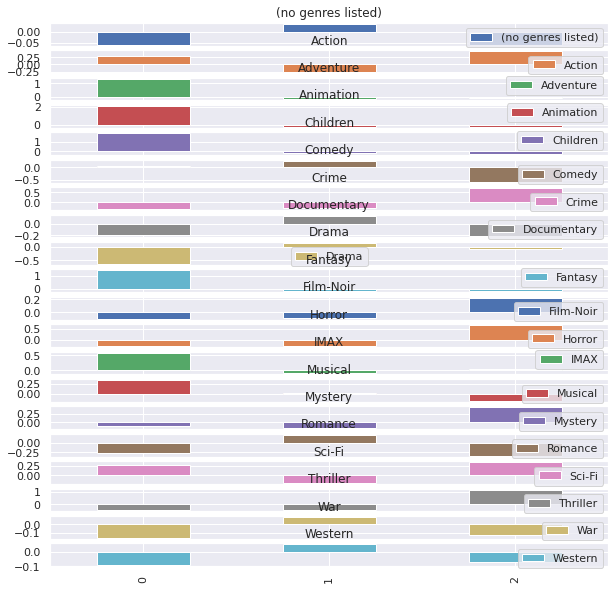

In [0]:
#um grafico pra cada grupo
grupos.plot.bar(subplots=True, figsize=(10,10), sharex=False)

In [0]:
#tranposicao de colunas
grupos.transpose()

,0,1,2
(no genres listed),-0.059180,0.038256,-0.059180
Action,0.268314,-0.259842,0.450945
Adventure,1.331756,-0.191744,-0.082827
Animation,2.101033,-0.252406,-0.236576
Children,1.817957,-0.189308,-0.266198
Comedy,0.036903,0.266573,-0.577055
Crime,-0.318263,-0.269172,0.685684
Documentary,-0.198716,0.136525,-0.215769
Drama,-0.635634,0.145895,-0.075420
Fantasy,1.383307,-0.172684,-0.142015


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fa095ca58>,
      dtype=object)

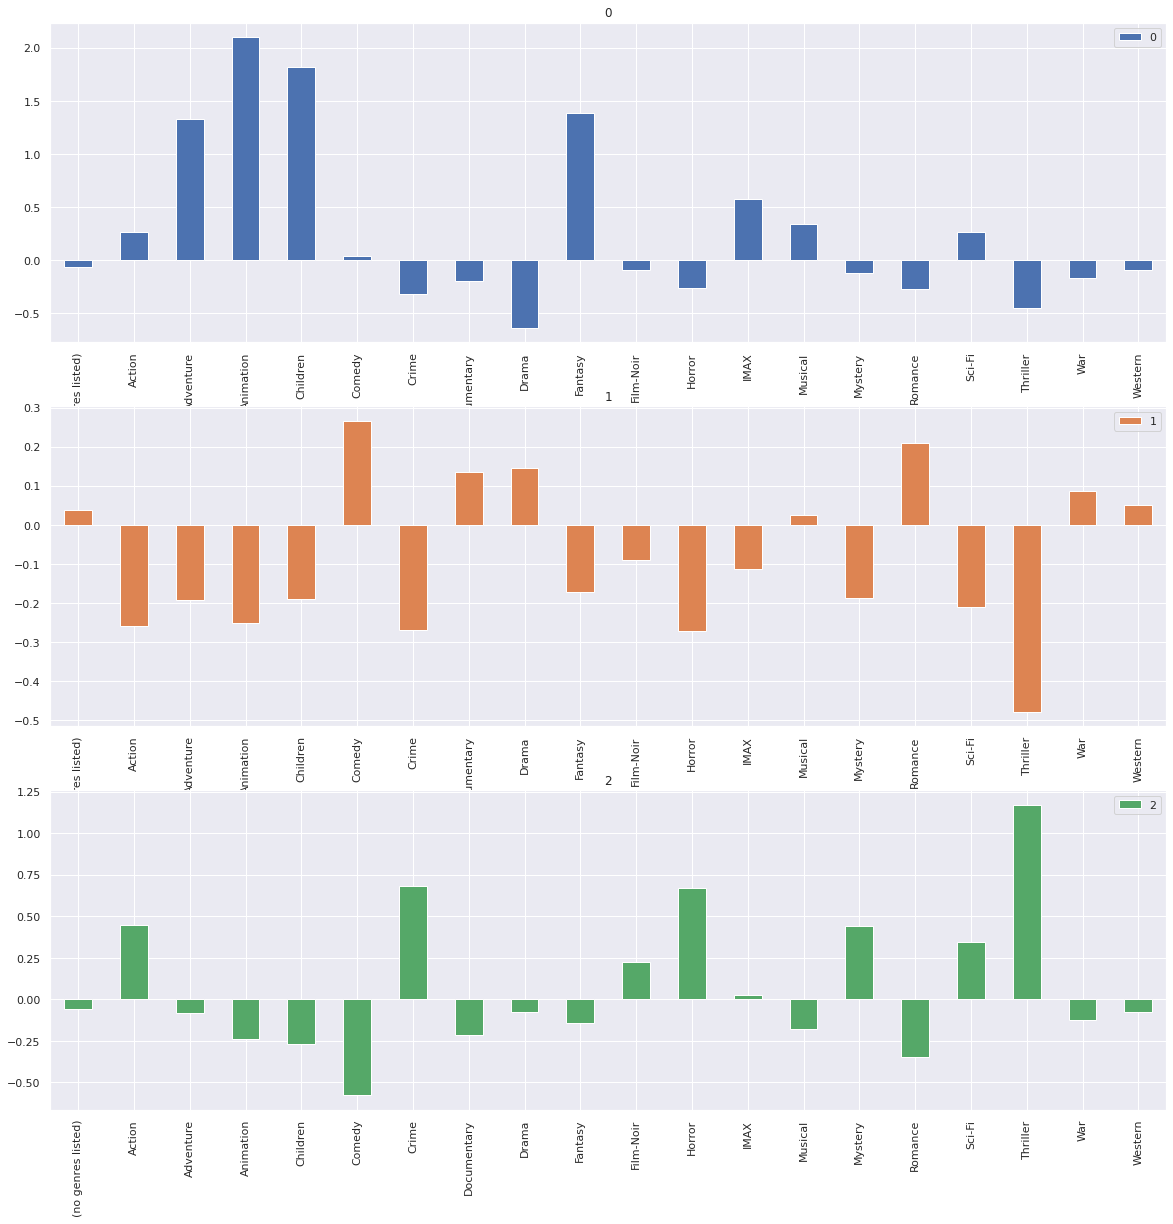

In [0]:
grupos.transpose().plot.bar(subplots=True, figsize=(20,20), sharex=False)

In [0]:
#fitrar o grupo
grupo = 0 
filtro = modelo.labels_ == grupo
dados_filmes_df[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7069,69644,Ice Age: Dawn of the Dinosaurs (2009),Action|Adventure|Animation|Children|Comedy|Rom...,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1577,2116,"Lord of the Rings, The (1978)",Adventure|Animation|Children|Fantasy,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5970,35347,Animal Farm (1954),Animation|Drama,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3286,4446,Final Fantasy: The Spirits Within (2001),Adventure|Animation|Fantasy|Sci-Fi,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3686,5076,"Adventures of Huck Finn, The (1993)",Adventure|Children|Comedy|Drama,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6946,65359,Earthsea (Legend of Earthsea) (2004),Adventure|Drama|Fantasy,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
8194,103228,Pacific Rim (2013),Action|Adventure|Sci-Fi|IMAX,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
870,1151,Lesson Faust (1994),Animation|Comedy|Drama|Fantasy,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
5586,26849,"Stand, The (1994)",Adventure|Drama|Fantasy|Horror|Sci-Fi,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0
9629,178827,Paddington 2 (2017),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#TSNE reduzir as dimensoes
from sklearn.manifold import TSNE

In [0]:
tsne = TSNE()
visulizar = tsne.fit_transform(generos_escalados_ndarray)
visulizar

array([[-64.64002  , -11.568781 ],
       [-21.021551 , -46.66143  ],
       [-28.926434 ,  19.285501 ],
       ...,
       [ -0.7900265,  15.61953  ],
       [-51.25457  ,   5.54463  ],
       [ -2.9760942, -21.442955 ]], dtype=float32)

In [0]:
#SEABORN, !pip install seaborn para pegar nova versao 
import seaborn as sns

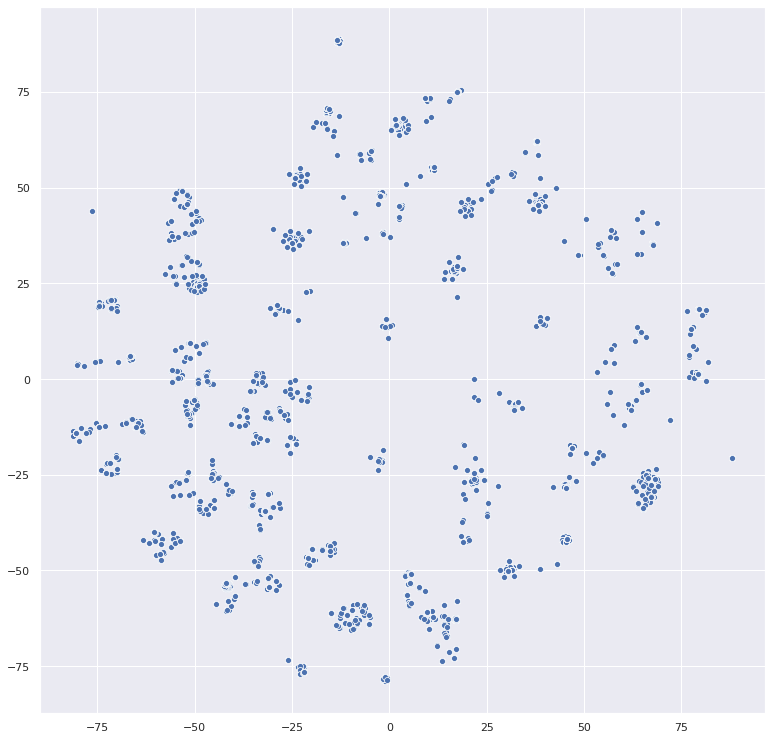

In [0]:
sns.scatterplot(x=visulizar[:,0], y=visulizar[:,1])

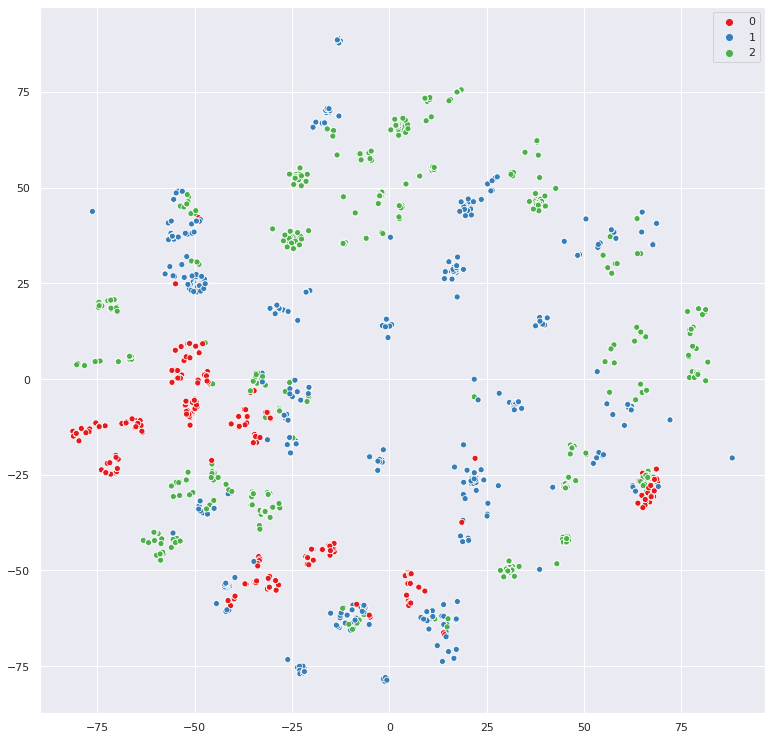

In [0]:
#inflcuir o hue para colocar as cores da classes q o kmean gero e o palette para corrigir o ton da cores
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visulizar[:,0], 
                y=visulizar[:,1], 
                hue=modelo.labels_,
                palette=sns.color_palette('Set1', 3))

#temos um ponto de observação: alguma cores e estao junta com outra esperavamos que nao, e visemos os grupos
#porem lembrando que o tsne quando diminui as dimensoes ele perde informaçoes assim nao vamos ver os grupos

In [0]:
#se tivere 20 grupo
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados_ndarray)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,1.285813,2.334384,-0.258679,-0.110820,-0.296200,-0.304656,-0.189815,-0.588187,3.392017,-0.094926,-0.161939,-0.128397,-0.188419,-0.127854,-0.256300,0.372511,-0.229861,-0.202020,-0.132065
1,-0.059180,-0.480607,-0.248851,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.969680,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.007316,-0.202020,-0.132065
2,-0.059180,-0.461681,-0.363951,-0.238362,-0.260678,-0.599828,-0.344642,4.597924,-0.806133,-0.285729,-0.094926,-0.317663,-0.128397,-0.188419,-0.229049,-0.429324,-0.334435,-0.478811,-0.202020,-0.132065
3,-0.059180,-0.442235,-0.174104,-0.042415,0.175389,0.300556,-0.283428,-0.001066,-0.079255,0.105632,-0.094926,-0.246815,-0.128397,5.307322,-0.170395,0.366906,-0.259726,-0.462867,-0.163428,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9df60b70>,
      dtype=object)

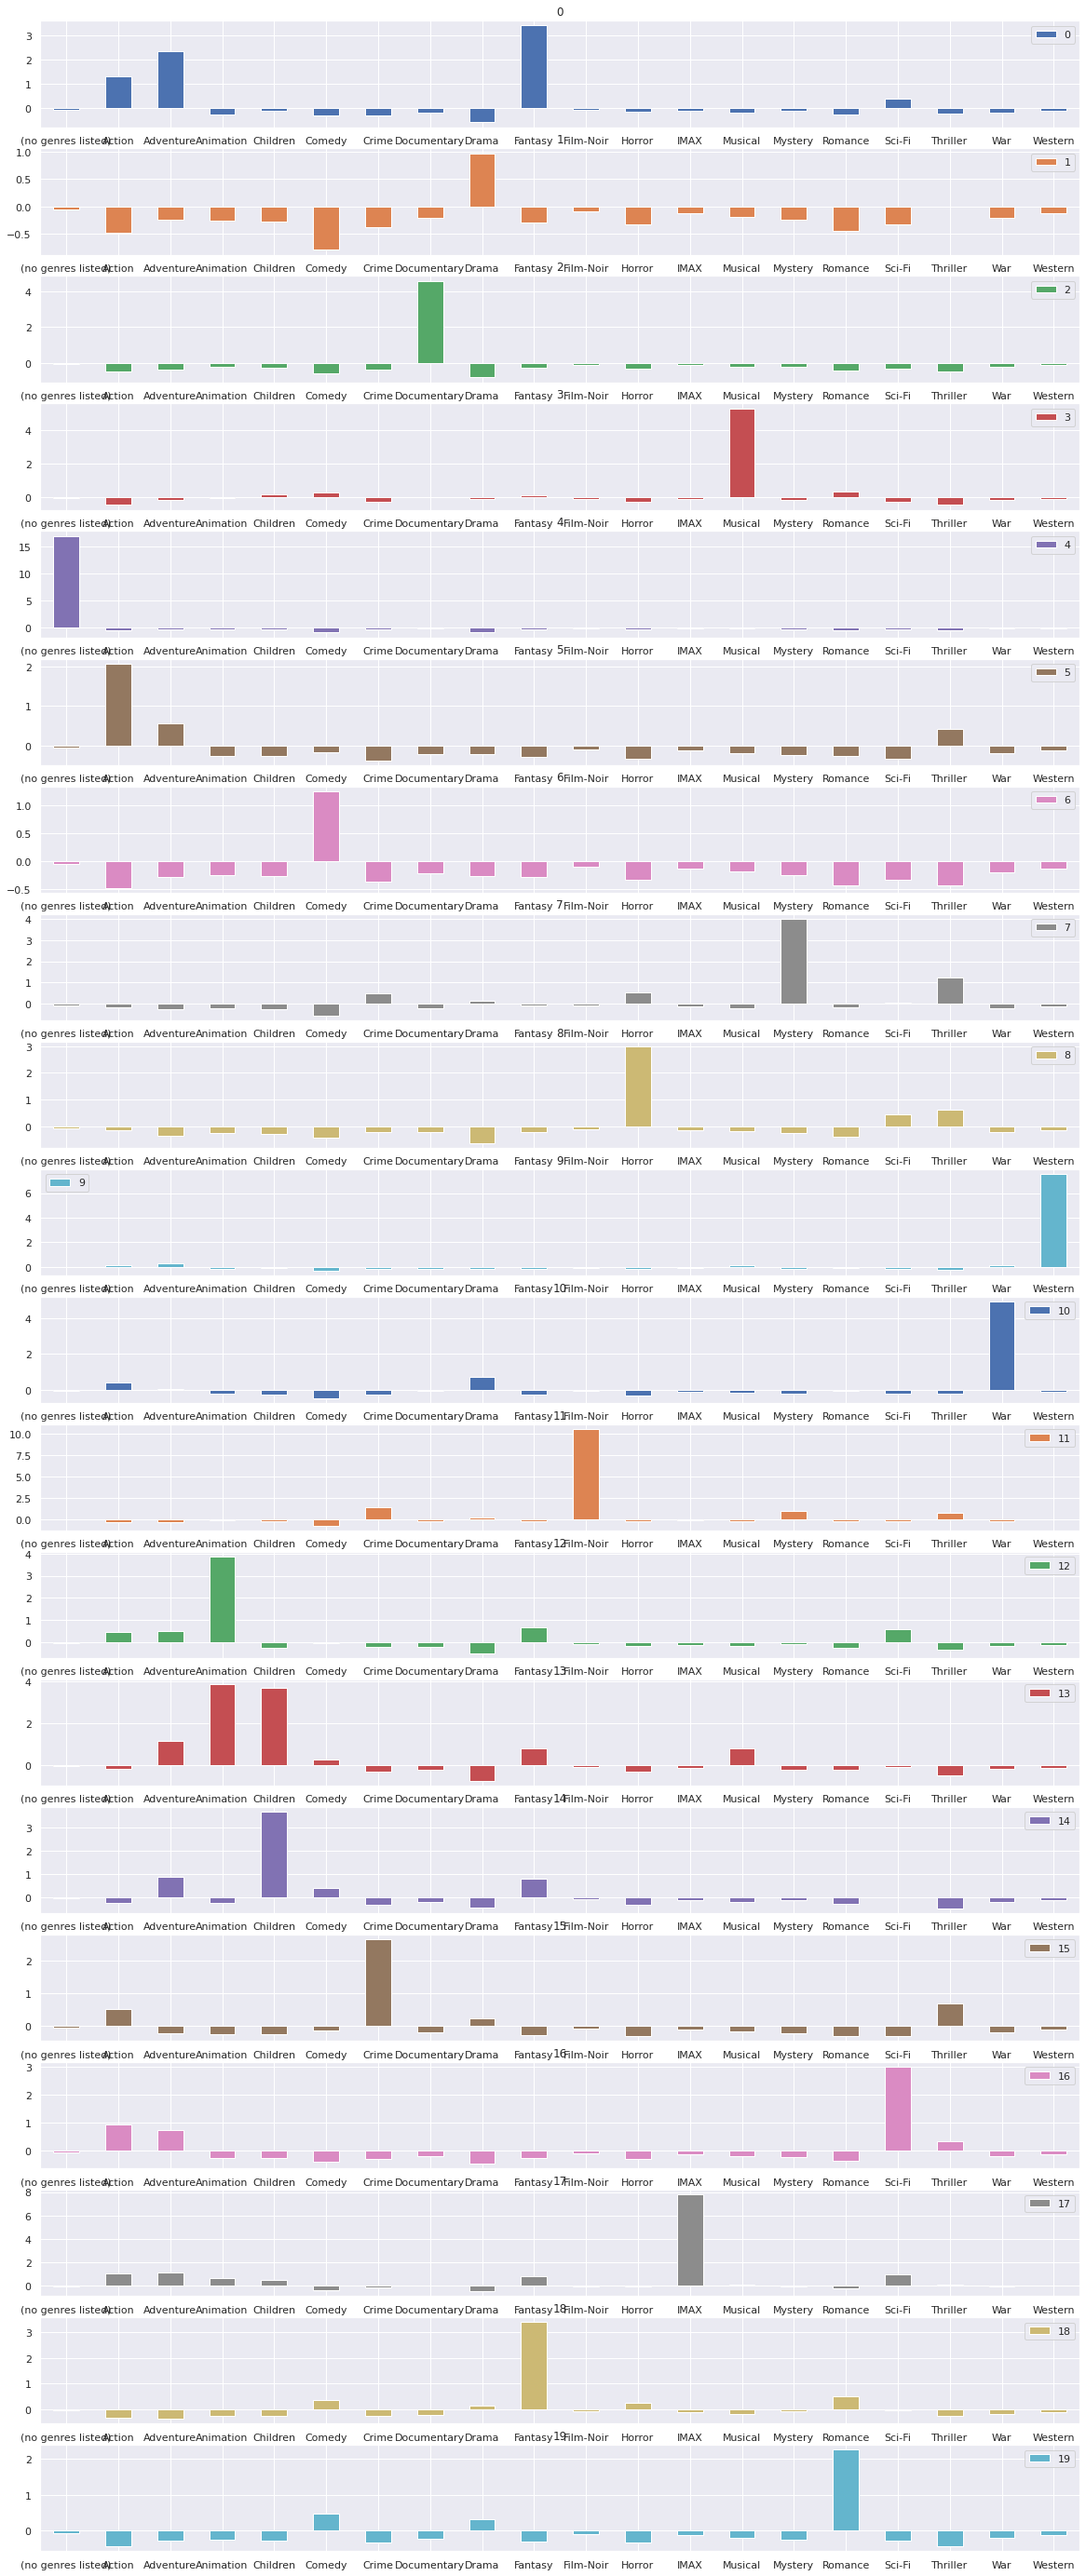

In [0]:
grupos.transpose().plot.bar(subplots=True, 
                            figsize=(20,50), 
                            sharex=False,
                            rot=0)

In [0]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_filmes_df[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
6485,53024,Jonestown: The Life and Death of Peoples Templ...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2247,2984,On Any Sunday (1971),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5894,33435,Los Angeles Plays Itself (2003),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5606,27002,From the Earth to the Moon (1998),Action|Documentary|Drama|Thriller,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0
4041,5736,Faces of Death 3 (1985),Documentary|Horror,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
7584,86290,American: The Bill Hicks Story (2009),Comedy|Documentary,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7597,86593,African Cats (2011),Adventure|Documentary,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8081,99846,Everything or Nothing: The Untold Story of 007...,Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6700,58309,War Dance (2007),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6707,58425,Heima (2007),Documentary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#metrica para qual a quantidade de grupos, retorna inertia_ erro medio quadratico
def kmeans(numero_clusters, generos):
  modelo = KMeans(numero_clusters)
  modelo.fit(generos)
  return [numero_clusters, modelo.inertia_]

In [0]:
kmeans(20, generos_df)

[20, 6139.355757742675]

In [0]:
#método é chamado de erro médio quadrado, ou mean squarred error (MSE).
resultado = [kmeans(numeros, generos_df) for numeros in range(1,41)]
resultado

[[1, 16970.71812769452],
 [2, 14211.954295080885],
 [3, 12429.18144209558],
 [4, 11419.783914729396],
 [5, 10916.594764058536],
 [6, 9958.000530757457],
 [7, 9684.50604928364],
 [8, 9005.716649493308],
 [9, 8668.776995348791],
 [10, 8138.695270683788],
 [11, 7928.4968107707655],
 [12, 7504.434569152817],
 [13, 7258.135148750864],
 [14, 7242.35144872147],
 [15, 6983.132188595722],
 [16, 6777.816270680539],
 [17, 6565.442729405883],
 [18, 6478.089383972733],
 [19, 6172.0463515039],
 [20, 6249.845894089018],
 [21, 6011.357127153154],
 [22, 5908.729896168966],
 [23, 5855.830427616451],
 [24, 5667.272830326192],
 [25, 5555.5156465988175],
 [26, 5477.78500891896],
 [27, 5235.201216639085],
 [28, 5259.586809541112],
 [29, 5169.607783841455],
 [30, 5122.309790562898],
 [31, 5066.691357667122],
 [32, 4985.760019217686],
 [33, 4852.582153237062],
 [34, 4821.585275031156],
 [35, 4757.615434044524],
 [36, 4709.665022347871],
 [37, 4616.600126361152],
 [38, 4510.931970257693],
 [39, 4485.1644240884

In [0]:
#transformar em grafico
result = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
result.head()

,grupos,inertia
0,1,16970.718128
1,2,14211.954295
2,3,12429.181442
3,4,11419.783915
4,5,10916.594764


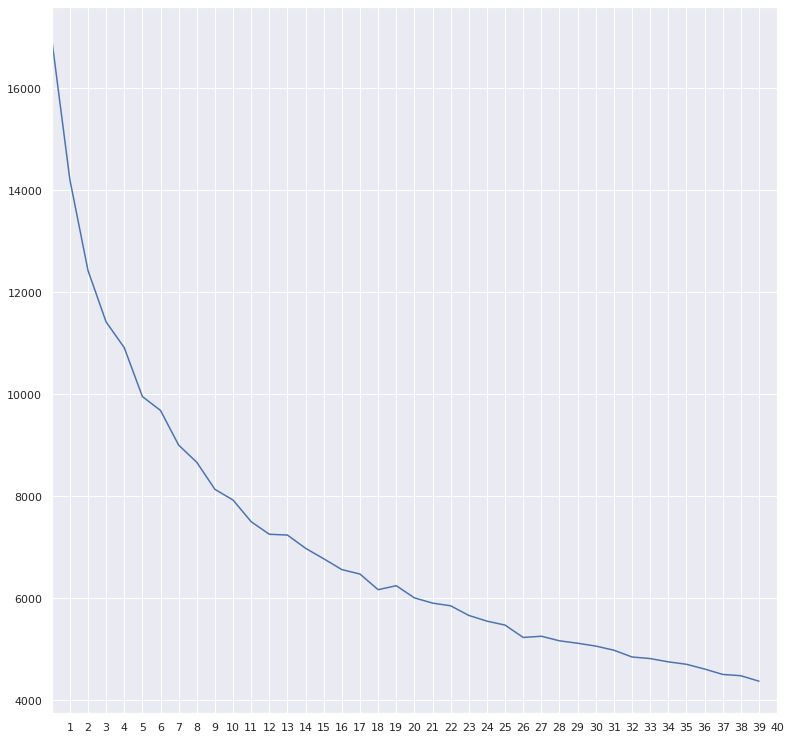

In [0]:
result.inertia.plot(xticks=result.grupos)

In [0]:
#técnica conhecida como "elbow method", ou "método do cotovelo" a curva do gráfico é decrescente de maneira regular, até que ela tem um momento de quebra e, então, continua caindo
kmeans(17, generos_df)

[17, 6500.461473158396]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f9cacbe10>,
      dtype=object)

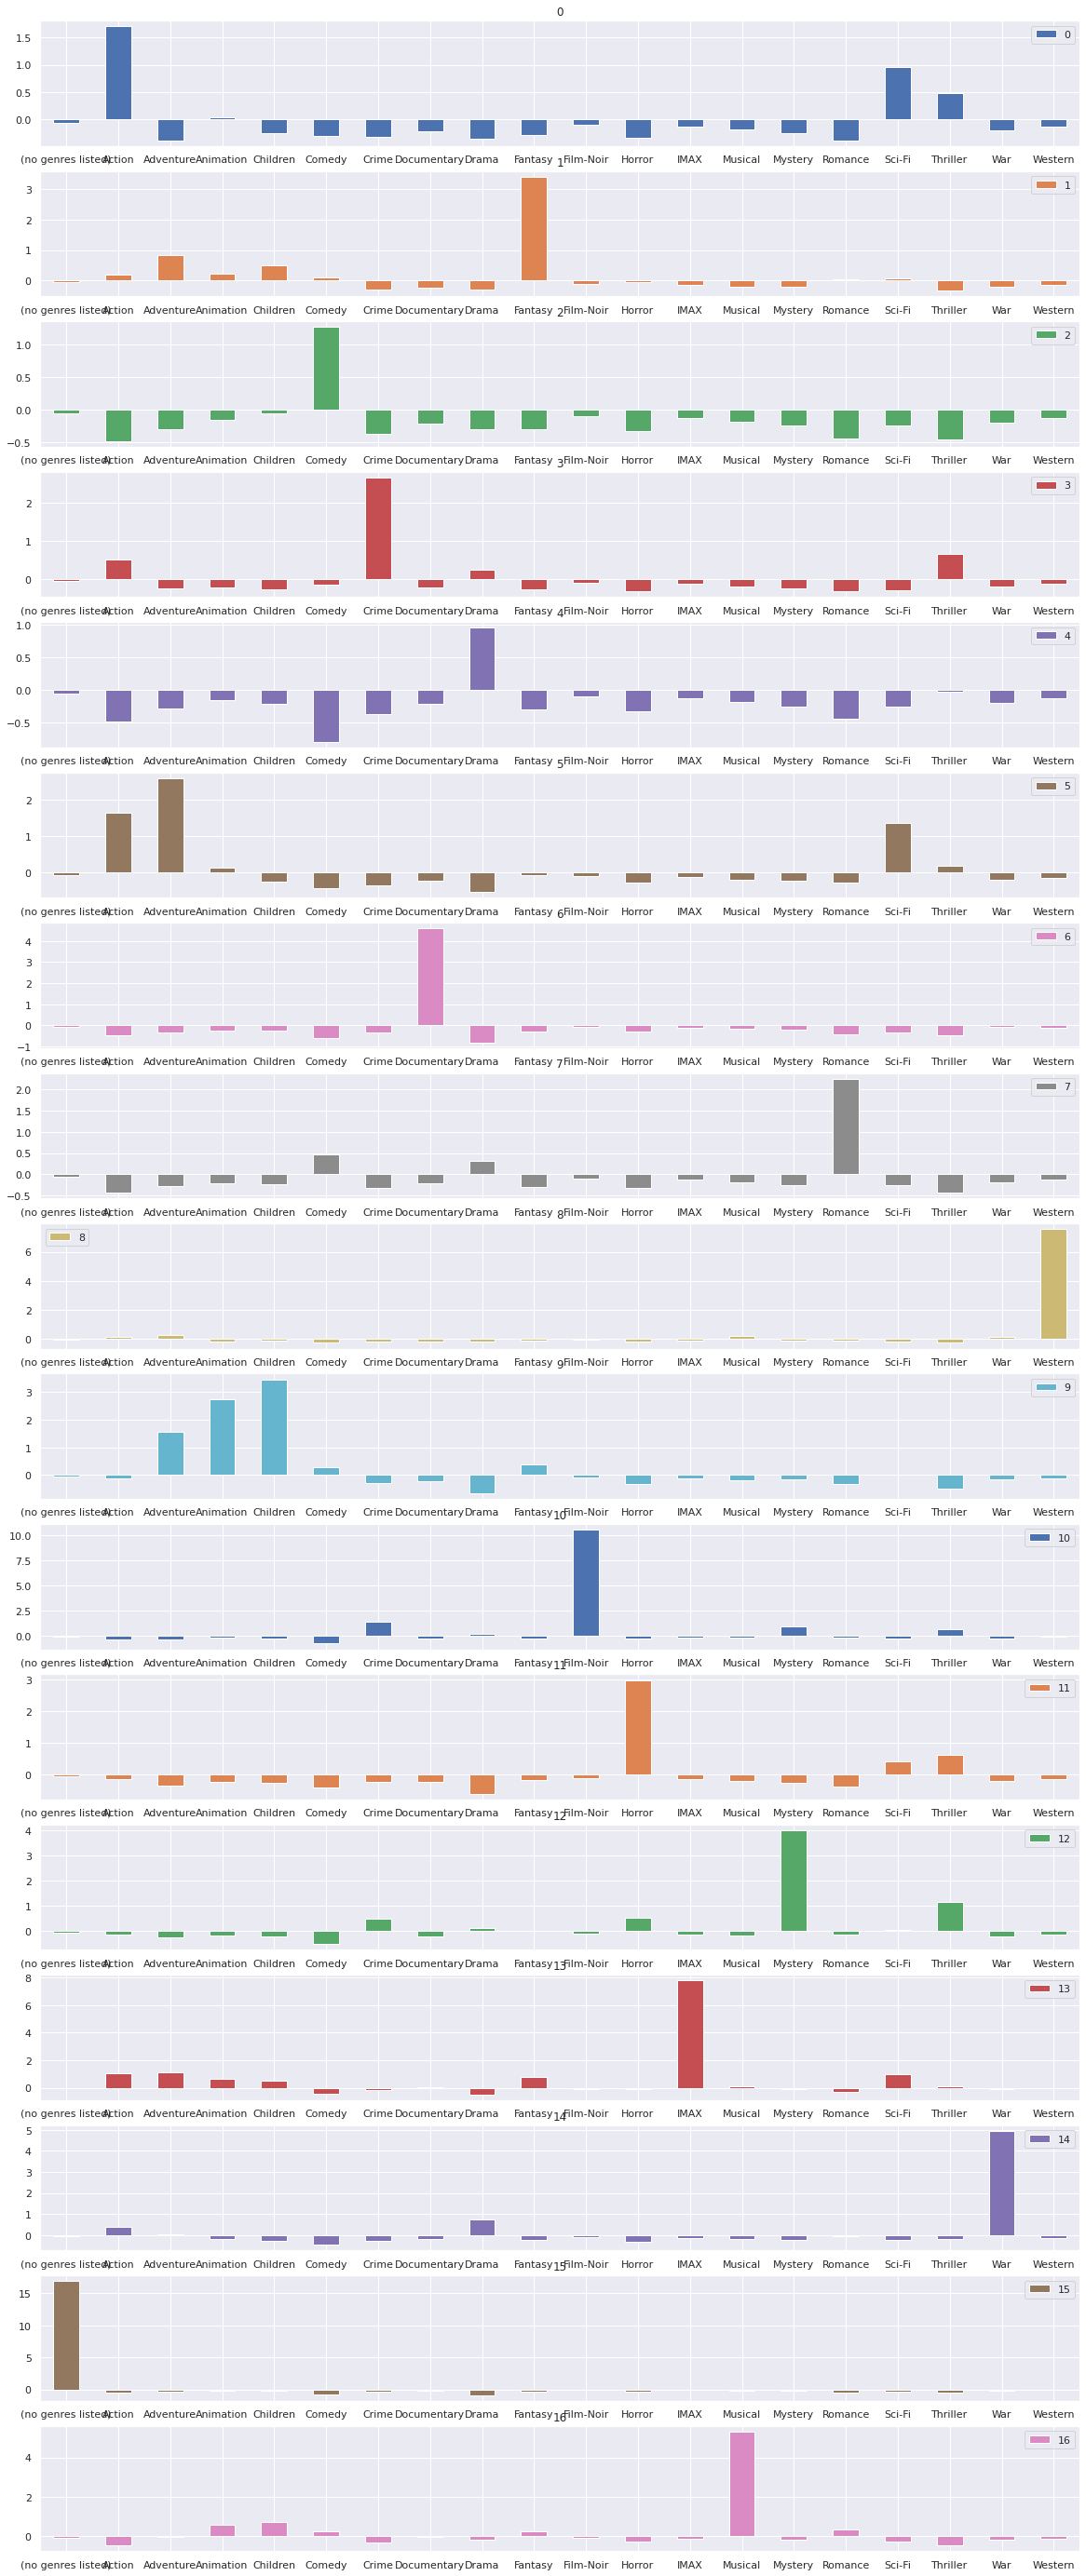

In [0]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados_ndarray)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos_df.columns)
grupos.transpose().plot.bar(subplots=True, 
                            figsize=(20,50), 
                            sharex=False,
                            rot=0)